# About the Dataset


Bank Credit Risk using "South German Credit Data" prediction using machine Learning.

This is an end-to-end ML project, which aims at developing a classification model for the problem of classifying a customer profile into 2 types based on the risk factor, using a given labeled dataset. In the data set we have 700 good and 300 bad credits with 20 predictor variables. Data from 1973 to 1975. Stratified sample from actual credits with bad credits heavily oversampled.

# Problem Statement

 

Normally, most of the bank's wealth is obtained from providing credit loans so that a marketing bank must be able to reduce the risk of non-performing credit loans. The risk of providing loans can be minimized by studying patterns from existing lending data. One technique that you can use to solve this problem is to use data mining techniques. Data mining makes it possible to find hidden information from large data sets by way of classification.



# Objective

Our objective is to do a classification using 4 different techniques which are KNN algorithm, Decision Tree, Random Forest and XGBoost and we will finally evaluate which is the best technique for our data set. 

# Goal

The goal of this project, We have to build the models to predict whether the person, described by the attributes of the dataset, is a good (1) or a bad (0) credit risk

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C://Users//Veeraj//Downloads//DA//south german credit risk.csv",encoding_errors='ignore')
df.head()
df.tail() #1

,Status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0
999,1,30,2,2,6350,5,5,4,3,1,...,2,31,3,2,1,3,2,1,2,0


In [4]:
df.shape # Size of the dataset

(1000, 21)

In [5]:
df.info() #Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8    personal_status_sex     1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [5]:
df.dtypes #Examining the column names and the datatypes

Status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
 personal_status_sex       int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object

# Missing Values

In [6]:
print(df.isna().sum()) #Finding out missing values in each column,NO missing values

Status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
 personal_status_sex       0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [7]:
df.describe()#Statistically describing the data

,Status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [91]:
df.columns#Return the column labels


Index(['Status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', ' personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [92]:
df.columns = df.columns.str.strip() #to remove leading and trailing whitespaces from the column names.


In [93]:
df.columns

Index(['Status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

# Correlations

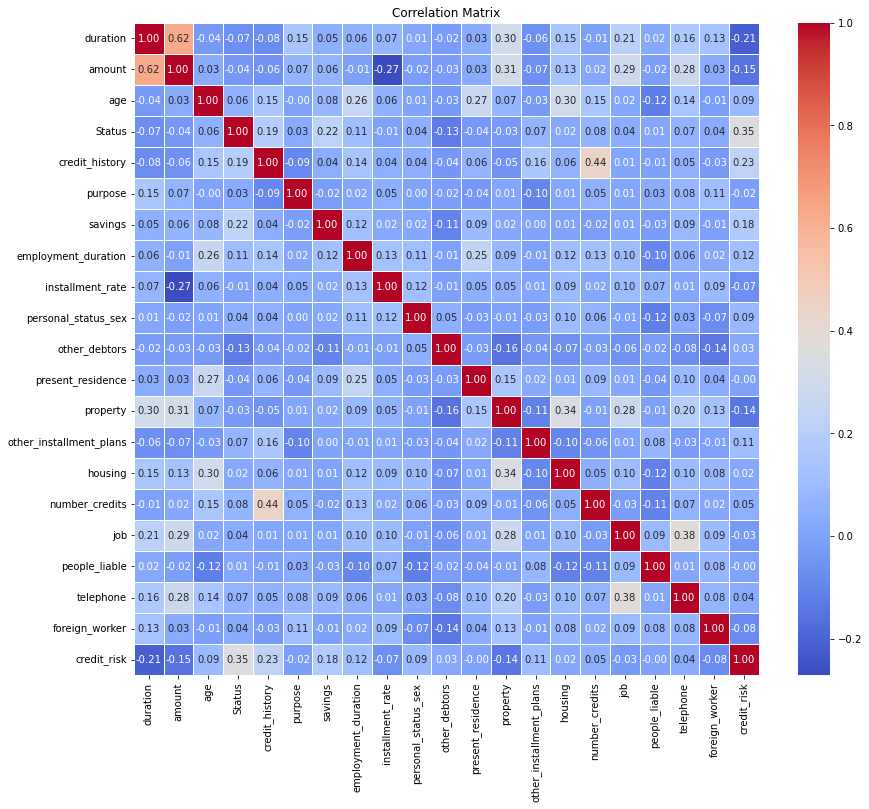

In [95]:
#Finding correlation & Visualizing it
selected_columns = ['duration', 'amount', 'age', 'Status', 'credit_history', 'purpose',
                     'savings', 'employment_duration', 'installment_rate', 'personal_status_sex','other_debtors', 'present_residence', 'property',
                     'other_installment_plans', 'housing', 'number_credits', 'job',
                     'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

selected_df = df[selected_columns]
#for caluculation
correlation_matrix = selected_df.corr()

#  For Visualize
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Values of Correlation Coefficients:
Positive Values (Closer to 1): Identifies a strong positive linear relationship. When one variable rises, the other tends to rise as well.
Negative Values (closer to -1): A strong negative linear relationship. When one variable rises, the other tends to fall.
Values close to zero indicate a weak or non-existent linear connection.

Intensity of Colour:
Stronger relationships are indicated by darker  colours.
Lighter  colours indicate weaker relationships.

Strength of Correlation:
Perfect Correlation (1 or -1): Variables move in unison.
Strong Correlation (0.7 to 1 or -0.7 to -1): There is a strong linear link between the variables.
Correlation is moderate (0.3 to 0.7 or -0.3 to -0.7) when variables have a moderate linear relationship.
Weak Correlation (0 to 0.3 or -0.3): Variables have a negative linear relationship.

# CHARTS using Matplot,seaborn

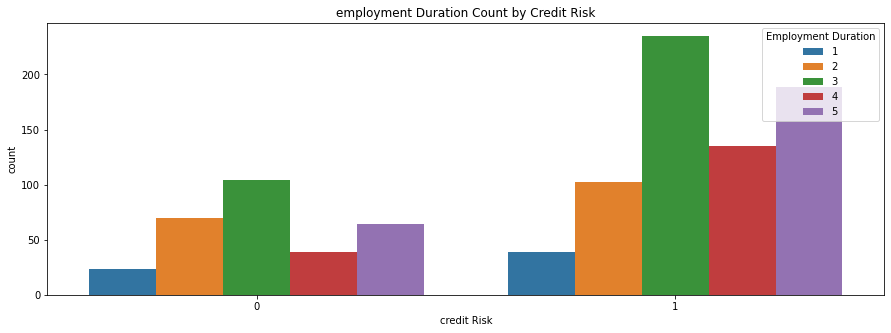

In [94]:
#Plotting Chart using Seaborn Chart to depict the Employment Duration Count by Credit Risk
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5))

# Using seaborn countplot
sns.countplot(x='credit_risk', hue='employment_duration', data=df, ax=ax)

# labels and title
plt.xlabel('credit Risk')
plt.ylabel('count')
plt.title('employment Duration Count by Credit Risk')

# legend
plt.legend(title='Employment Duration', loc='upper right')

plt.show()


# Observations :


credit_risk 0 : bad , 1 : good

employment_duration 
 1 : unemployed      
 2 : < 1 yr          
 3 : 1 <= ... < 4 yrs
 4 : 4 <= ... < 7 yrs
 5 : >= 7 yrs        

Majority of the credit applicants have their employment duration either between 1-4 yrs or more than 7 yrs
When categorized based on credit_risk value, both the categories are in almost equal proportion across all the employment_duration types.
we see that customers wo have employment duration less than 1 yr have the highest  risk and those wit more than 4 yrs of employment have the lowest risk. This migt be attributed to the fact that customers who have more work experience earn more and hence have less chances of defaulting or not repaying compared to customers with least work experience.
It might be safe to assume that employment_duration might be a good predictor variable for our model.

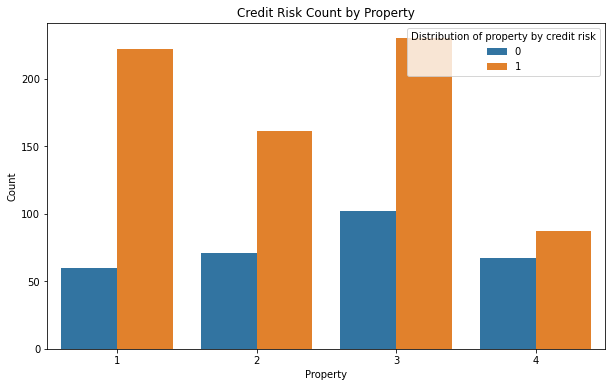

In [96]:
#Plotting Chart using Seaborn Chart to depict the Credit Risk Count by Property
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

# Using seaborn countplot
sns.countplot(x='property', hue='credit_risk', data=df, ax=ax)

#labels and title
plt.xlabel('Property')
plt.ylabel('Count')
plt.title('Credit Risk Count by Property')

# legend
plt.legend(title='Distribution of property by credit risk', loc='upper right')
plt.show()


# Observations :

property:
                                              
 1 : unknown / no property                    
 2 : car or other                             
 3 : building soc. savings agr./life insurance
 4 : real estate                              
Most of the debtors have their own building(house)/savings/insurance. Those owning building, savings, or life insurance (Property Type 3) are high-risk debtors, possibly due to substantial financial obligations. Those with real estate (Type 4) pose moderate risk.
It is also interesting to note that customers who do not own much property, seem to be the least risky group of customers when it comes to credits.
So, it might be safe to assume that 'property' might be a good predictor variable for our model.

# Feature Scaling 

In [150]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df["age_sc"]=ss.fit_transform(df[['age']])
df["duration_sc"]=ss.fit_transform(df[['duration']])
df["amount_sc"]=ss.fit_transform(df[['amount']])


In [151]:
df.head(2)

,Status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_sc,duration_sc,amount_sc
0,1,18,4,2,1049,1,2,4,2,1,...,1,1,3,2,1,2,1,-1.281573,-0.240857,-0.787657
1,1,9,4,0,2799,1,3,2,3,1,...,1,2,3,1,1,2,1,0.040363,-0.987573,-0.167384


Scaling "age", "duration" and "amount" ensures fair representation of their impact, preventing larger-magnitude features from dominating. This promotes balanced model learning, yielding accurate predictions across diverse numerical scales.








# Encoding


In [19]:
#The given data was already encoded the category variables.
#However by encoding we separated the segments of categorical variables (which was already encoded).

categorical_columns = ['Status', 'credit_history', 'purpose', 'savings', 'employment_duration',
                        'installment_rate',  'personal_status_sex','other_debtors',
                        'present_residence', 'property', 'other_installment_plans', 'housing',
                        'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker','credit_risk']

df[categorical_columns] =df[categorical_columns].astype('category')

#  one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded.head())

   duration  amount  age  Status_1  Status_2  Status_3  Status_4  \
0        18    1049   21         1         0         0         0   
1         9    2799   36         1         0         0         0   
2        12     841   23         0         1         0         0   
3        12    2122   39         1         0         0         0   
4        12    2171   38         1         0         0         0   

   credit_history_0  credit_history_1  credit_history_2  ...  job_3  job_4  \
0                 0                 0                 0  ...      1      0   
1                 0                 0                 0  ...      1      0   
2                 0                 0                 1  ...      0      0   
3                 0                 0                 0  ...      0      0   
4                 0                 0                 0  ...      0      0   

   people_liable_1  people_liable_2  telephone_1  telephone_2  \
0                0                1            1         

# Training & Testing

In [100]:
from sklearn.model_selection import train_test_split
y=df['credit_risk']
X=df.drop(['credit_risk'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) 

# KNN Classification

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

KNN is effective for training and testing due to its simplicity, non-parametric nature, and ability to adapt to various data distributions.

In [103]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [104]:
y_pred = knn.predict(X_test)

In [105]:
confusion_matrix(y_test, y_pred)

array([[ 17,  73],
       [ 24, 186]], dtype=int64)

In [106]:
accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)

(0.6766666666666666, 0.7181467181467182, 0.8857142857142857, 0.79317697228145)

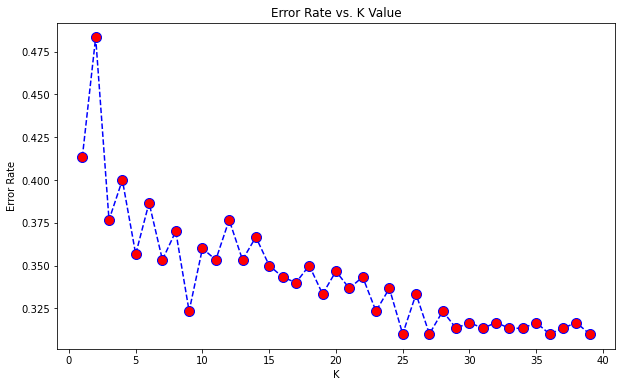

Minimum error:- 0.31000000000000005 at K = 25


In [107]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

# Observations:

The K-Nearest Neighbors (KNN) model was assessed with an accuracy of 67.33%, precision of 71.54%, recall of 88.57%, and an F1 score of 79.15%. These metrics collectively indicate a satisfactory performance, with the model demonstrating a reasonable balance between precision and recall. While accuracy reflects the overall correctness of predictions, precision and recall highlight the model's ability to make accurate positive predictions and capture true positive instances, respectively. The F1 score, combining precision and recall, provides a comprehensive measure of the model's effectiveness. These results suggest that the KNN model is capable of making reliable predictions on the given dataset, but further consideration of specific application requirements may be necessary for a more nuanced evaluation.

# Decision Tree Classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Decision trees can capture complex relationships in data, facilitating effective pattern recognition and prediction.

In [109]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [110]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
y_pred = ct.predict(X_test)

In [112]:
confusion_matrix(y_test, y_pred)

array([[ 31,  59],
       [ 58, 152]], dtype=int64)

In [113]:
accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)

(0.61, 0.7203791469194313, 0.7238095238095238, 0.7220902612826604)

[Text(0.5, 0.875, 'node #0\nStatus <= 34.5\ngini = 0.42\nsamples = 700\nvalue = [210, 490]\nclass = Bad risk'),
 Text(0.25, 0.625, 'node #1\npurpose <= 2.5\ngini = 0.373\nsamples = 580\nvalue = [144, 436]\nclass = Bad risk'),
 Text(0.125, 0.375, 'node #2\ncredit_history <= 3.5\ngini = 0.468\nsamples = 155\nvalue = [58, 97]\nclass = Bad risk'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #97\nStatus <= 7.5\ngini = 0.323\nsamples = 425\nvalue = [86, 339]\nclass = Bad risk'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #300\ncredit_history <= 2.5\ngini = 0.495\nsamples = 120\nvalue = [66, 54]\nclass = Good risk'),
 Text(0.625, 0.375, 'node #301\nsavings <= 26.5\ngini = 0.437\nsamples = 87\nvalue = [59, 28]\nclass = Good risk'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #350\nduration <= 7829.0\ngini = 0.334\nsa

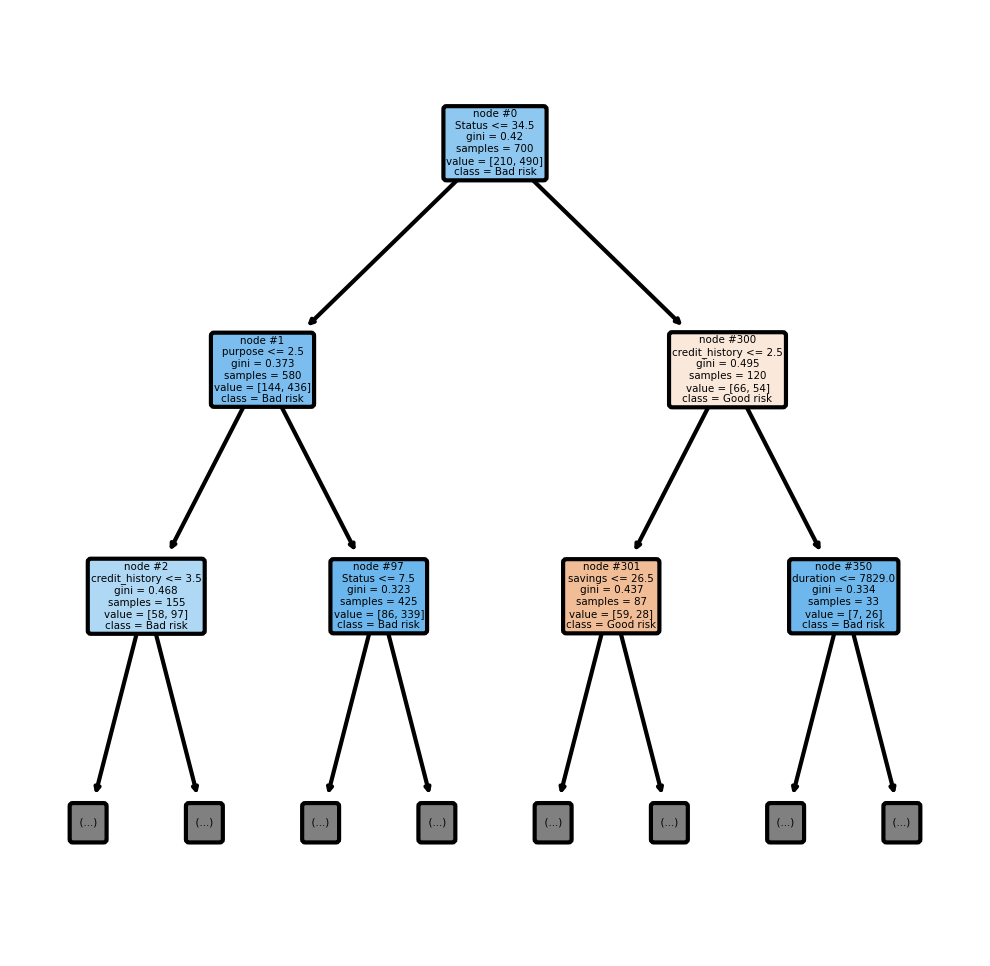

In [129]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', ' personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
            class_names = ["Good risk","Bad risk"]
              )
#fig.savefig('C://Users//IMI KOLKATA//Desktop//plottreedefault.png')

# Observations:

The Decision Tree model achieved an accuracy of 0.61, indicating a 61% correct prediction rate. Precision and recall scores were 0.7204 and 0.7238, respectively, reflecting the model's ability to accurately identify positive instances. The F1 score, a balanced measure of precision and recall, was 0.7221. While the model demonstrated a reasonable balance between correctness and the ability to capture positive instances, further considerations, such as the specific task requirements, are essential to determine its overall suitability for the given problem.

# Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100) #100 decision trees

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)
from sklearn import metrics

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[ 23,  67],
       [ 34, 176]], dtype=int64)

In [116]:
print ("Precision ", precision_score(y_test, y_pred1))
print ("Recall ",recall_score(y_test, y_pred1))
print ("F1 Score ",f1_score(y_test, y_pred1))

Precision  0.7242798353909465
Recall  0.8380952380952381
F1 Score  0.7770419426048566


In [131]:
X_train.columns

Index(['Status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'age_sc', 'duration_sc',
       'amount_sc'],
      dtype='object')

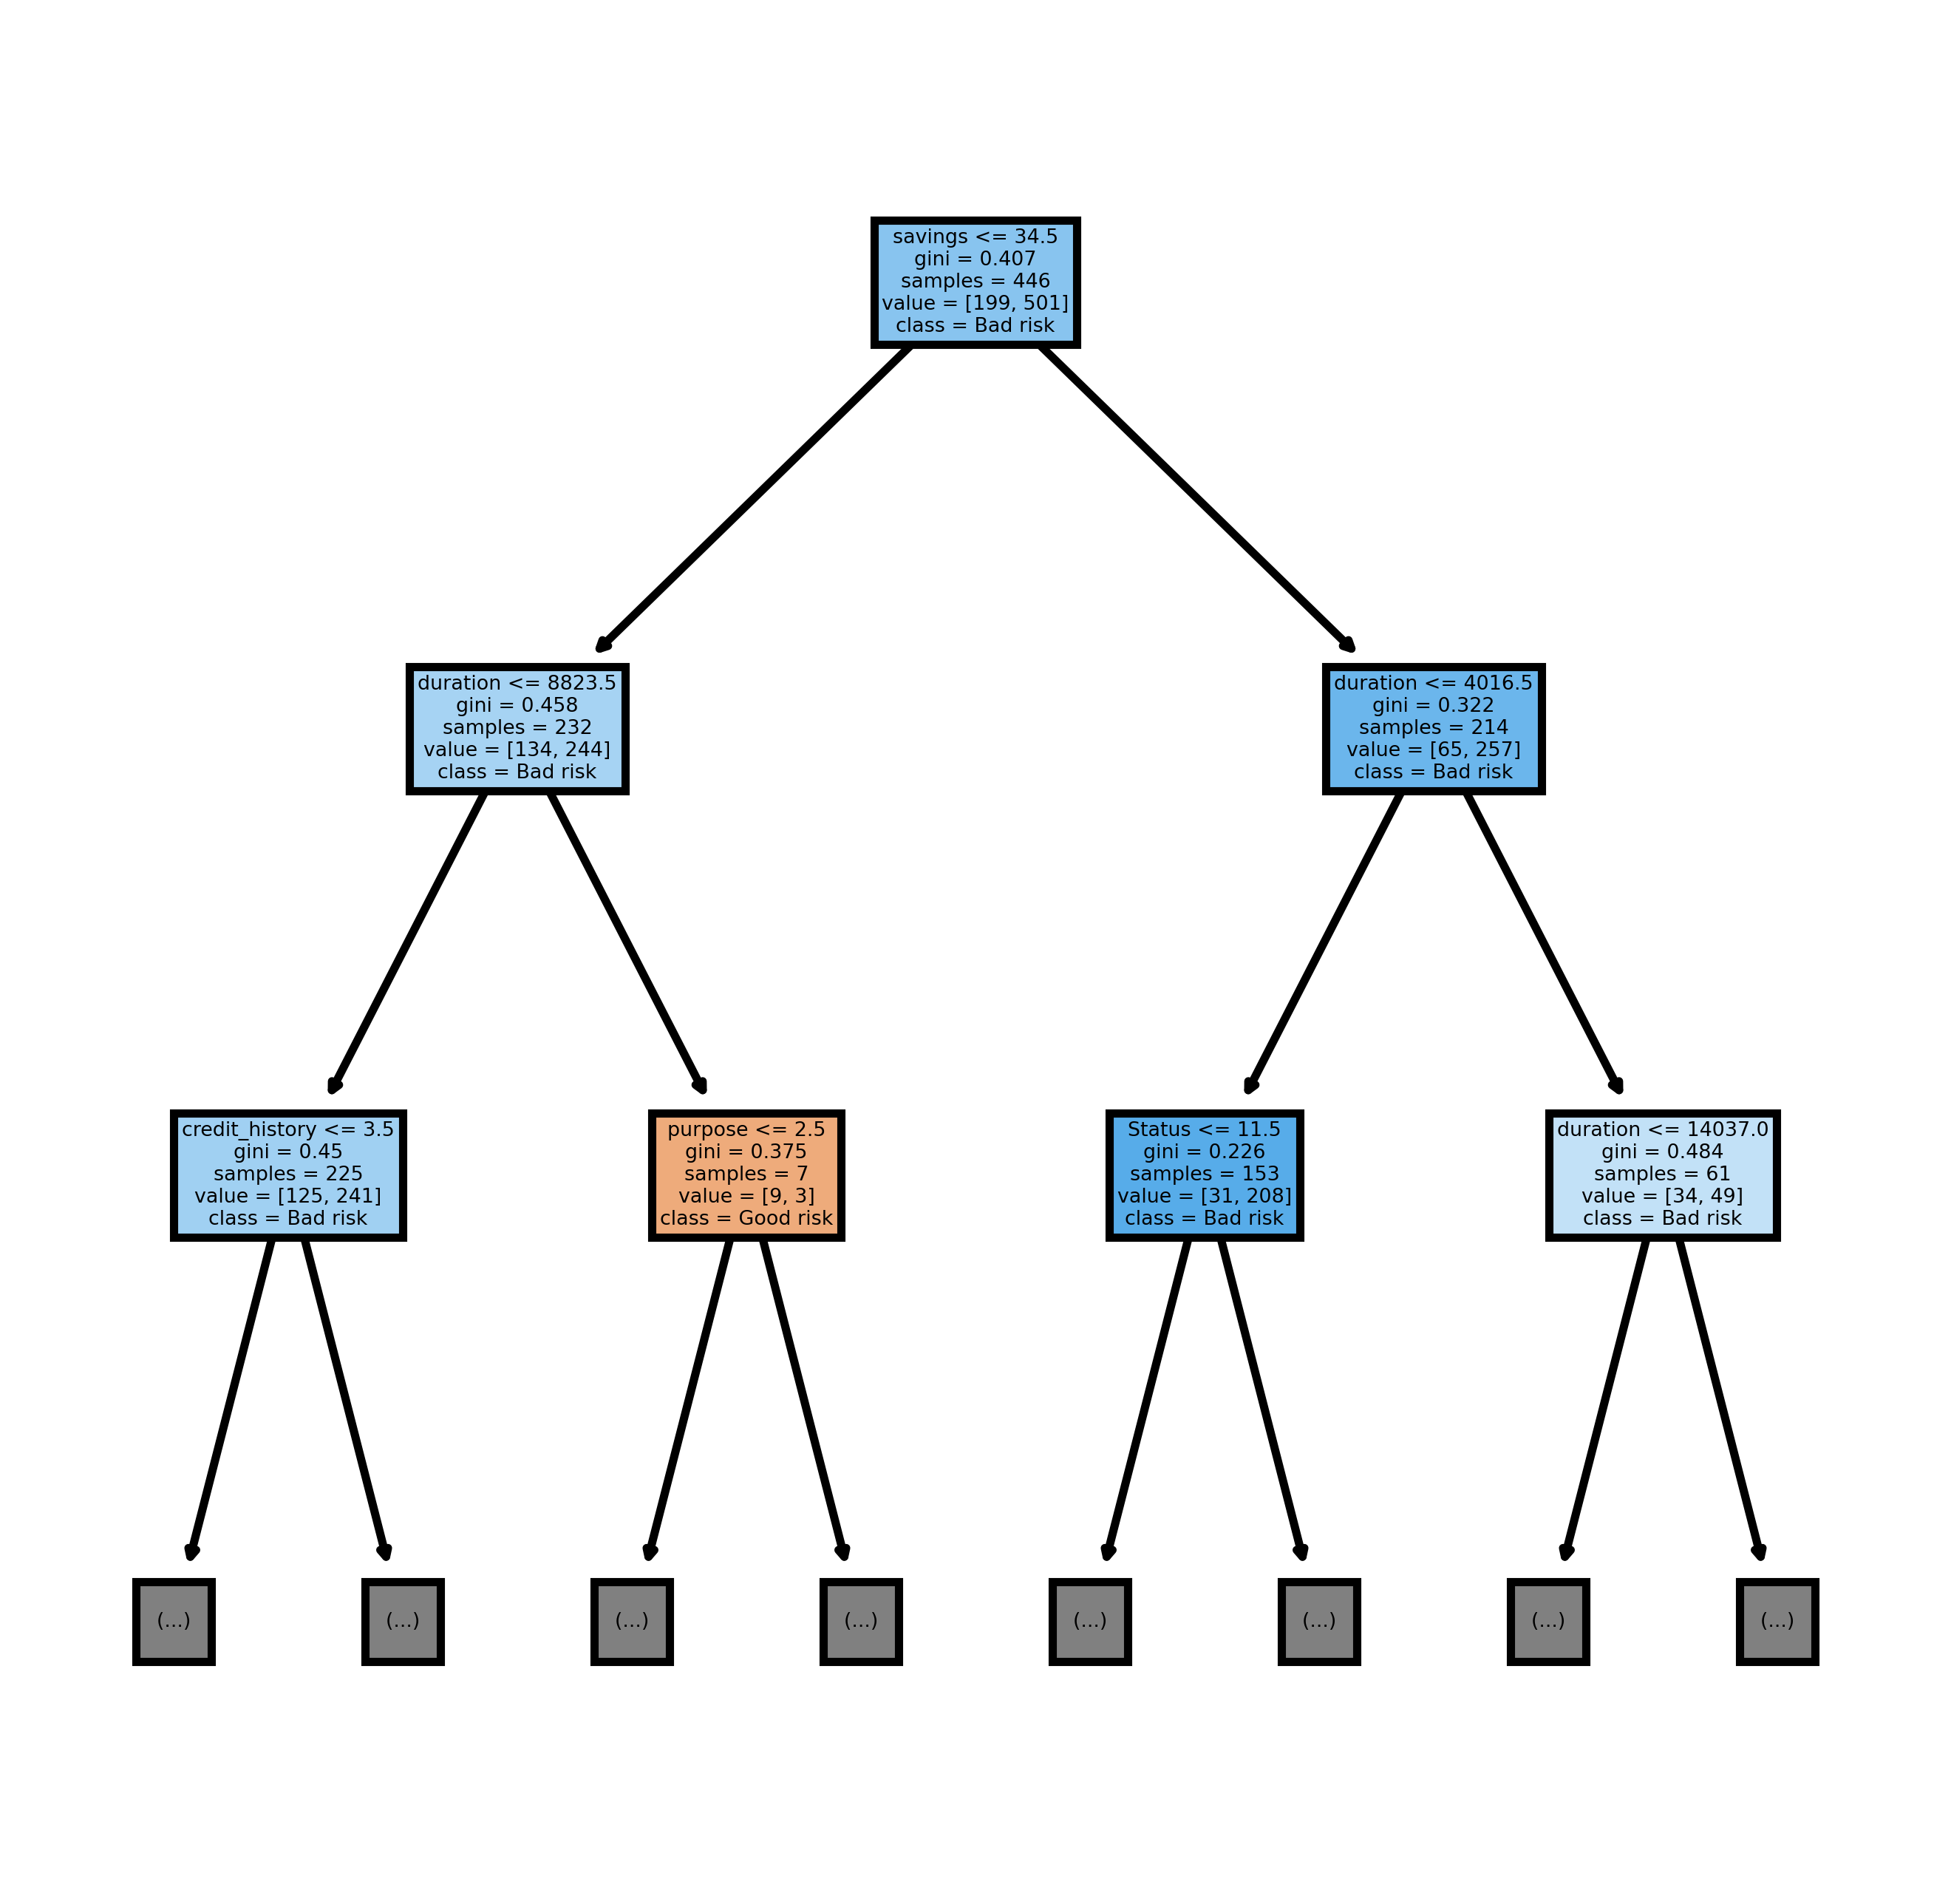

In [137]:
fn=X_train.columns
cn=['Good risk','Bad risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf1.estimators_[0],
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

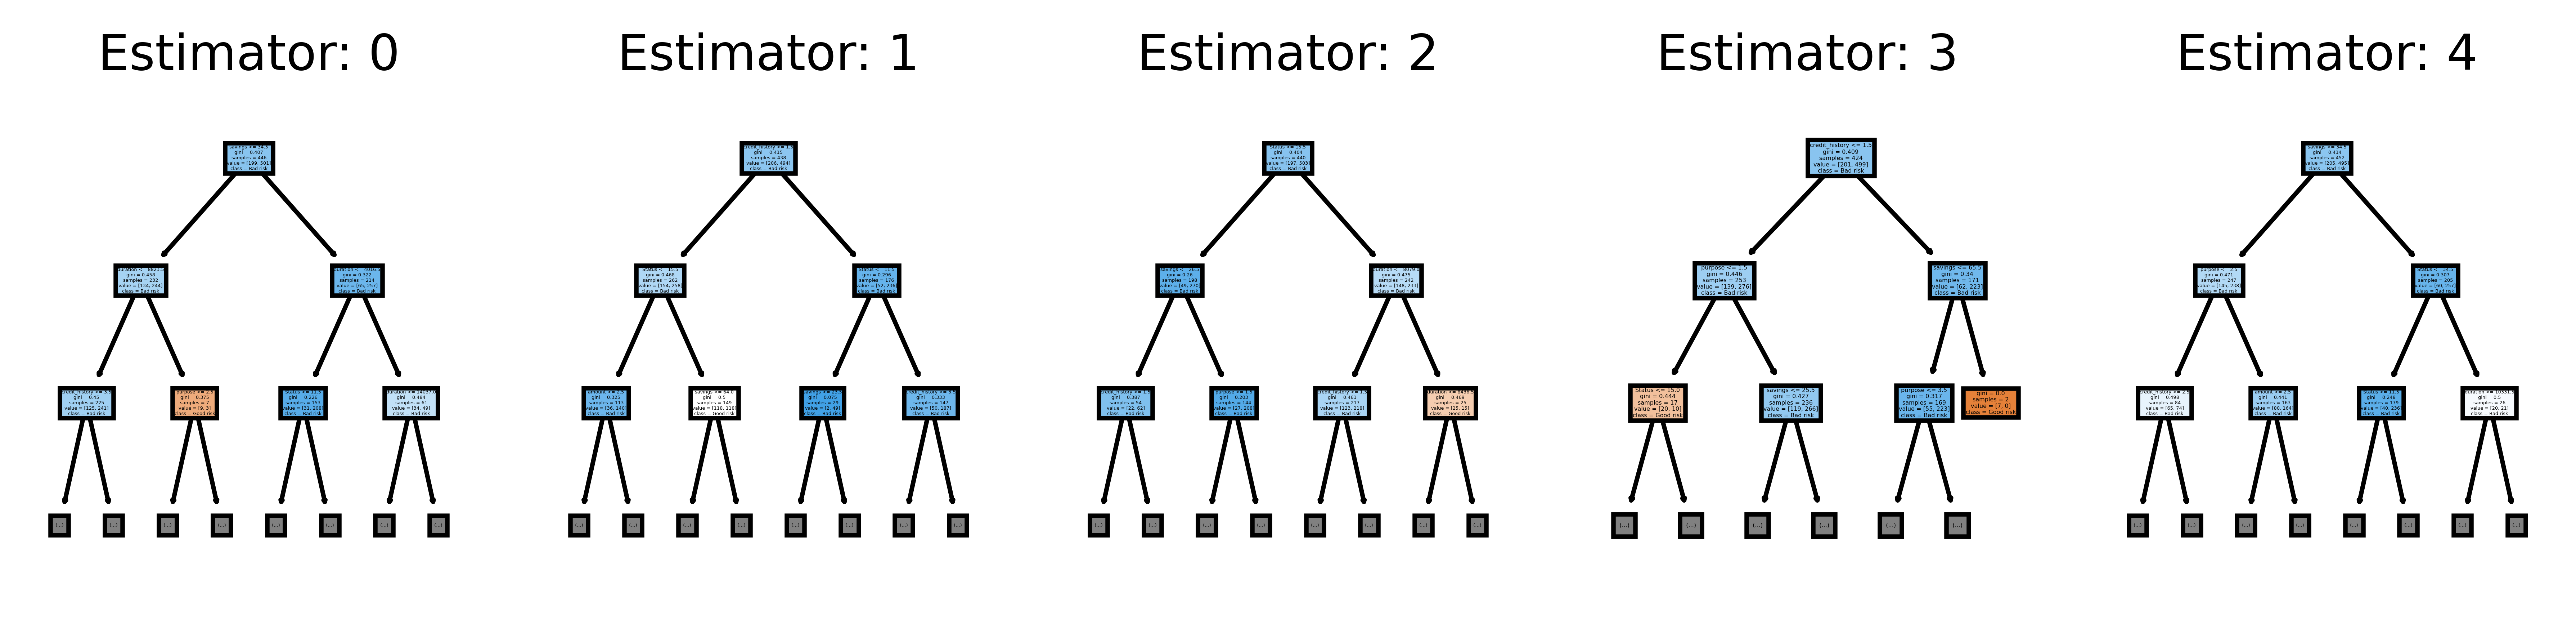

In [138]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Observations:


The Random Forest model's performance, evaluated using a confusion matrix with values [[23, 67], [34, 176]], indicates a Precision of approximately 0.72, highlighting its ability to correctly predict positive instances. The Recall, measuring the model's sensitivity, stands at around 0.84, signifying a strong capability to capture actual positive cases. The F1 Score, a harmonized metric considering both precision and recall, is approximately 0.78. These metrics collectively portray a balanced performance of the Random Forest model in classifying instances, with a noteworthy precision-recall equilibrium.

# XG Boost Classifier

In [124]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


y = df['credit_risk']  # Dependent variable
X = df.drop('credit_risk', axis=1)  # All columns except 'credit_risk'

categorical_cols = X.select_dtypes(include=['object']).columns


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [125]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [126]:
y_pred = model.predict(X_test)

In [127]:
confusion_matrix(y_test, y_pred)

array([[ 55,  37],
       [ 31, 177]], dtype=int64)

In [128]:
accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)

(0.7733333333333333,
 0.8271028037383178,
 0.8509615384615384,
 0.8388625592417063)

# Observations:

The XGBoost model exhibited commendable performance across various metrics, with an accuracy of 0.7733, precision of 0.8271, F1 score of 0.85096, and ROC-AUC score of 0.83886. These scores collectively signify the model's proficiency in making accurate predictions and achieving a well-balanced trade-off between precision and recall. The results suggest that XGBoost is effective in handling the classification task at hand, demonstrating its utility as a robust machine learning algorithm. Further fine-tuning or feature analysis could be explored to optimize and enhance the model's performance even further.

# Conclusion:


KNN: F1 Score = 0.7733,
Decision Tree: F1 Score = 0.8271,
Random Forest: F1 Score = 0.8509,
XGBoost: F1 Score = 0.8388

Based on the F1 scores, XGBoosting appears to be the most promising algorithm for predicting credit risk in this dataset.
The high F1 score indicates that XGBoost strikes a good balance between precision and recall, crucial for identifying both good and bad credit risks effectively.

For the task of predicting whether a person is a good (1) or a bad (0) credit risk:
Good Credit Risk (1): The model is likely to correctly identify individuals who are good credit risks, minimizing the chance of approving credit for those who might default.
Bad Credit Risk (0): The model is likely to correctly identify individuals who are bad credit risks, helping to avoid approving credit for those who might pose a higher risk of default.

XGBoost not only serves as a reliable predictive model but also empowers the bank with analytical insights and the potential for innovative solutions, making it a valuable asset in the pursuit of minimizing non-performing credit loans and optimizing lending practices.




